<a href="https://colab.research.google.com/github/himuethic/Bagging.Ml/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine.csv


In [ ]:
df = pd.read_csv('Wine.csv')

In [ ]:
df['type']. value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['type'] = encoder.fit_transform(df['type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
df = df[['alcohol','density','type']]

In [ ]:
df.tail()

,alcohol,density,type
6492,10.5,0.99490,0
6493,11.2,0.99512,0
6494,11.0,0.99574,0
6495,10.2,0.99547,0
6496,11.0,0.99549,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

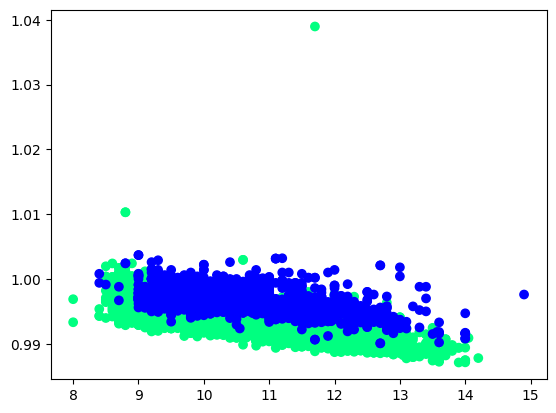

In [ ]:
plt.scatter(df['alcohol'],df['density'],c=df['type'],cmap='winter')

In [ ]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_test

,alcohol,density,type
2764,9.5,0.99612,1
4592,12.2,0.99122,1
5025,10.9,0.99640,0
5892,9.4,0.99918,0
5421,9.4,0.99780,0


In [ ]:
X_test = df_val.iloc[:,0:2]. values
y_test = df_val.iloc[:,-1]. values

In [ ]:
X_test

array([[ 9.5    ,  0.99592],
       [11.8    ,  0.99081],
       [10.7    ,  0.99176],
       [ 8.9    ,  0.99862],
       [ 9.4    ,  0.99548]])

In [ ]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,alcohol,density,type
3732,10.3,0.99293,1
2170,9.1,0.99860,1
6164,10.3,0.99564,0
6164,10.3,0.99564,0
4613,9.8,0.99442,1
2366,9.0,0.99679,1
5950,12.9,0.99258,0
3981,10.7,0.99280,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

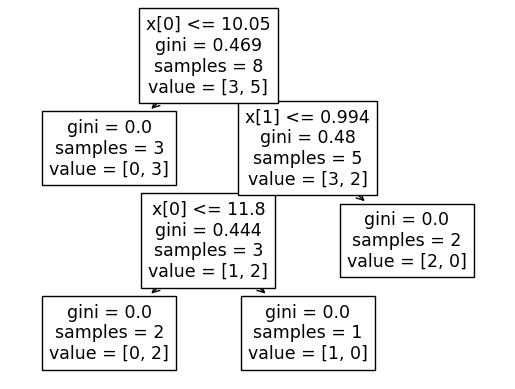

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


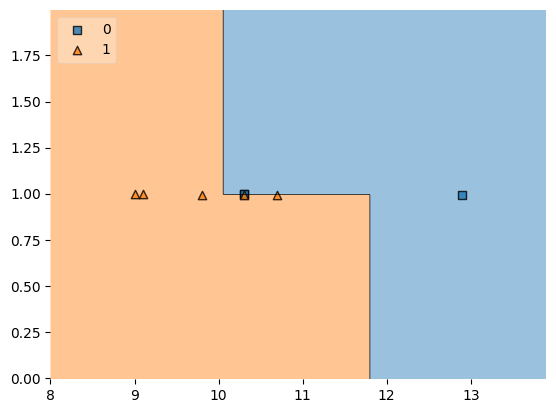

In [ ]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_pred, y_test))

dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X, y)

In [ ]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,alcohol,density,type
3073,12.0,0.99052,1
3730,9.0,1.00022,1
3073,12.0,0.99052,1
2826,9.1,0.99590,1
5950,12.9,0.99258,0
4613,9.8,0.99442,1
3732,10.3,0.99293,1
6164,10.3,0.99564,0


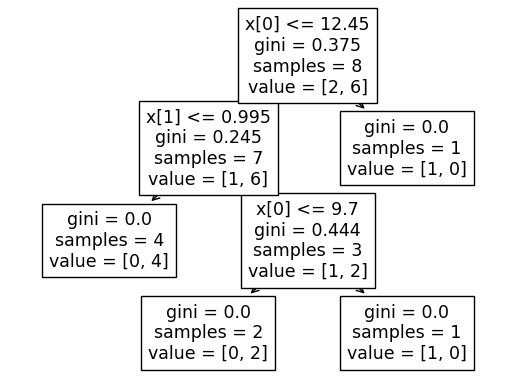

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


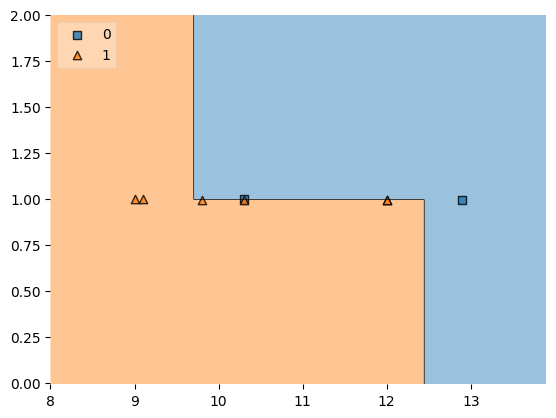

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,alcohol,density,type
2826,9.1,0.99590,1
4613,9.8,0.99442,1
2366,9.0,0.99679,1
3073,12.0,0.99052,1
5950,12.9,0.99258,0
4613,9.8,0.99442,1
2170,9.1,0.99860,1
3073,12.0,0.99052,1


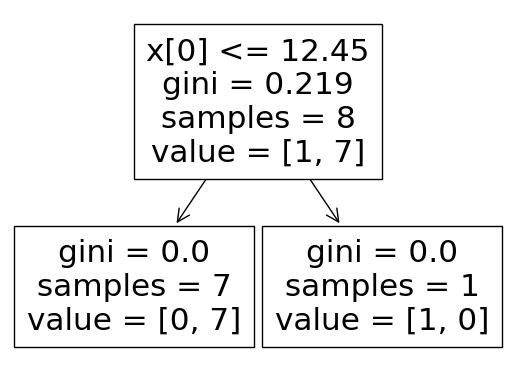

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


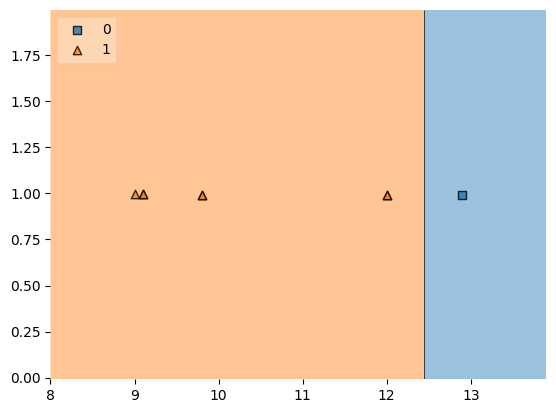

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [ ]:
df_test

,alcohol,density,type
2764,9.5,0.99612,1
4592,12.2,0.99122,1
5025,10.9,0.99640,0
5892,9.4,0.99918,0
5421,9.4,0.99780,0


In [ ]:
import numpy as np

print("predictor1", dt_bag1.predict(np.array([10.9, 0.99640]).reshape(1, -1)))
print("predictor2", dt_bag2.predict(np.array([10.9, 0.99640]).reshape(1, -1)))
print("predictor3", dt_bag3.predict(np.array([10.9, 0.99640]).reshape(1, -1)))

predictor1 [0]
predictor2 [0]
predictor3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
